## Fase 1: obtener e inspeccionar archivos

En esta fase te harás una idea general del contenido de los datos y generarás un reporte al respecto (ej., imprimiendo mensajes, presentando tablas de resumen, etc.). Además, seleccionarás un segmento de los datos que consideres útil para realizar tu análisis.

Pautas generales:a

* Utilizar una librería especializada para leer los archivos de datos y agregarlos según sea necesario (ej., utilizando los métodos `append` o `concat` si eliges cargarlos utilizando la librería `pandas`).
* Inspeccionar el archivo a partir de sus encabezados, columnas y descripciones de las variables según su tipo (ej., numéricas, categóricas).
* Declarar una estructura de datos (ej., una lista) para almacenar un subconjunto de variables que puedan ser relevantes para la problemática de interés.

Preguntas guía:

* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Qué planteas para manejarlos?

In [14]:
import pandas as pd

# datos
file_path = "Saber_11°_2020-1_20250914.csv"
df = pd.read_csv(file_path, low_memory=False)


# Variable , Calendario + puntajes principales
cols_interes = [
    "COLE_CALENDARIO",
    "PUNT_LECTURA_CRITICA",
    "PUNT_MATEMATICAS",
    "PUNT_C_NATURALES",
    "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_INGLES",
    "PUNT_GLOBAL"
]
df = df[cols_interes]


# Quitar filas sin información de calendario
df = df.dropna(subset=["COLE_CALENDARIO"])

#estadísticas 
print(" ----- Distribucion de estudiantes por calendario ----")
print(df["COLE_CALENDARIO"].value_counts())

print(" ----- Promedios generales por calendario ----")
print(df.groupby("COLE_CALENDARIO").mean(numeric_only=True))

# promedios
print(" ----- Estadísticas especificas ppromedio, min, max ----")
print(df.groupby("COLE_CALENDARIO").describe())


 ----- Distribucion de estudiantes por calendario ----
COLE_CALENDARIO
B       11865
A        3055
OTRO      515
Name: count, dtype: int64
 ----- Promedios generales por calendario ----
                 PUNT_LECTURA_CRITICA  PUNT_MATEMATICAS  PUNT_C_NATURALES  \
COLE_CALENDARIO                                                             
A                           49.281833         46.678560         44.823241   
B                           62.253434         62.178845         59.378930   
OTRO                        50.759223         47.547573         46.409709   

                 PUNT_SOCIALES_CIUDADANAS  PUNT_INGLES  PUNT_GLOBAL  
COLE_CALENDARIO                                                      
A                               44.028478    45.982612   230.928314  
B                               58.510746    70.511406   306.692120  
OTRO                            45.883495    49.351456   238.895146  
 ----- Estadísticas especificas ppromedio, min, max ----
                PUNT_

## Fase 2: identificar características y relaciones en las variables

En esta fase realizarás análisis descriptivo para identificar posibles patrones o relaciones entre las variables de interés para la problemática planteada. Además, expondrás estadísticas descriptivas y visualizaciones para concluir al respecto de los patrones y las relaciones identificadas. Finalmente, elegirás el segmento de los datos sobre el cual profundizarás con tu análisis (este puede ser, o no, igual al seleccionado anteriormente).

Pautas generales:

* Calcular estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable sociodemográfica relevante en el contexto del problema.
* Utilizar librerías especializadas (ej., `matplotlib`, `seaborn`, etc.) para inspeccionar visualmente variables de interés. Los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser útiles.
* Utilizar el método `groupby` de `pandas`, en conjunto con métodos de visualización, puede proveer evidencia del impacto de las variables sociodemográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:

* ¿Hay patrones de interés en las distribuciones de las variables o en las relaciones entre ellas?
* ¿Consideras que existe algún impacto significativo de variables sociodemográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables harías un análisis más profundo?

--- Estadísticas generales ---
       Puntos_espanol  Puntos_matematicas  Puntos_ciencias  Puntos_sociales  \
count    15399.000000        15399.000000     15399.000000     15399.000000   
mean        59.338723           58.666017        56.094617        55.263069   
std         11.581152           13.501255        12.365056        13.774366   
min          0.000000            0.000000         0.000000         0.000000   
25%         52.000000           50.000000        47.000000        45.000000   
50%         61.000000           60.000000        57.000000        57.000000   
75%         68.000000           68.000000        65.000000        66.000000   
max        100.000000          100.000000       100.000000       100.000000   

       Puntos_ingles  Puntos_global  
count   15399.000000   15399.000000  
mean       64.948633     289.627443  
std        17.863339      60.198828  
min         0.000000       0.000000  
25%        52.000000     245.000000  
50%        67.000000     295.

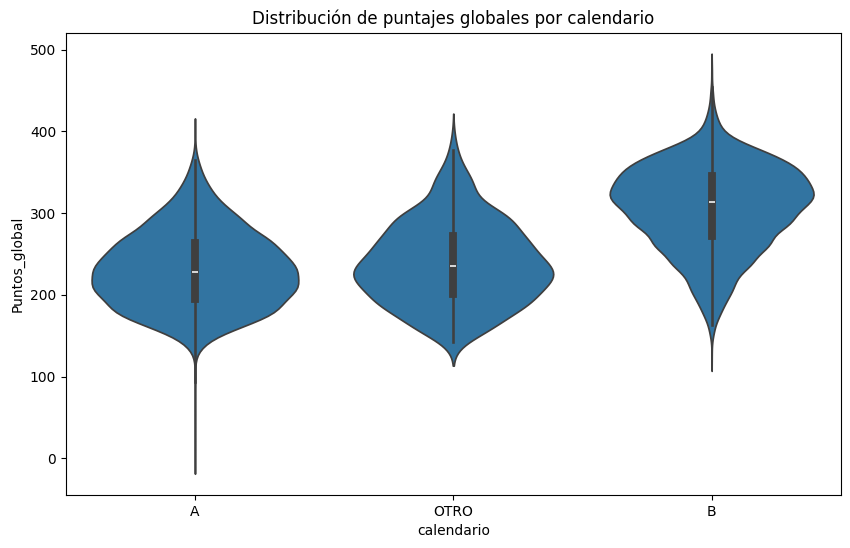

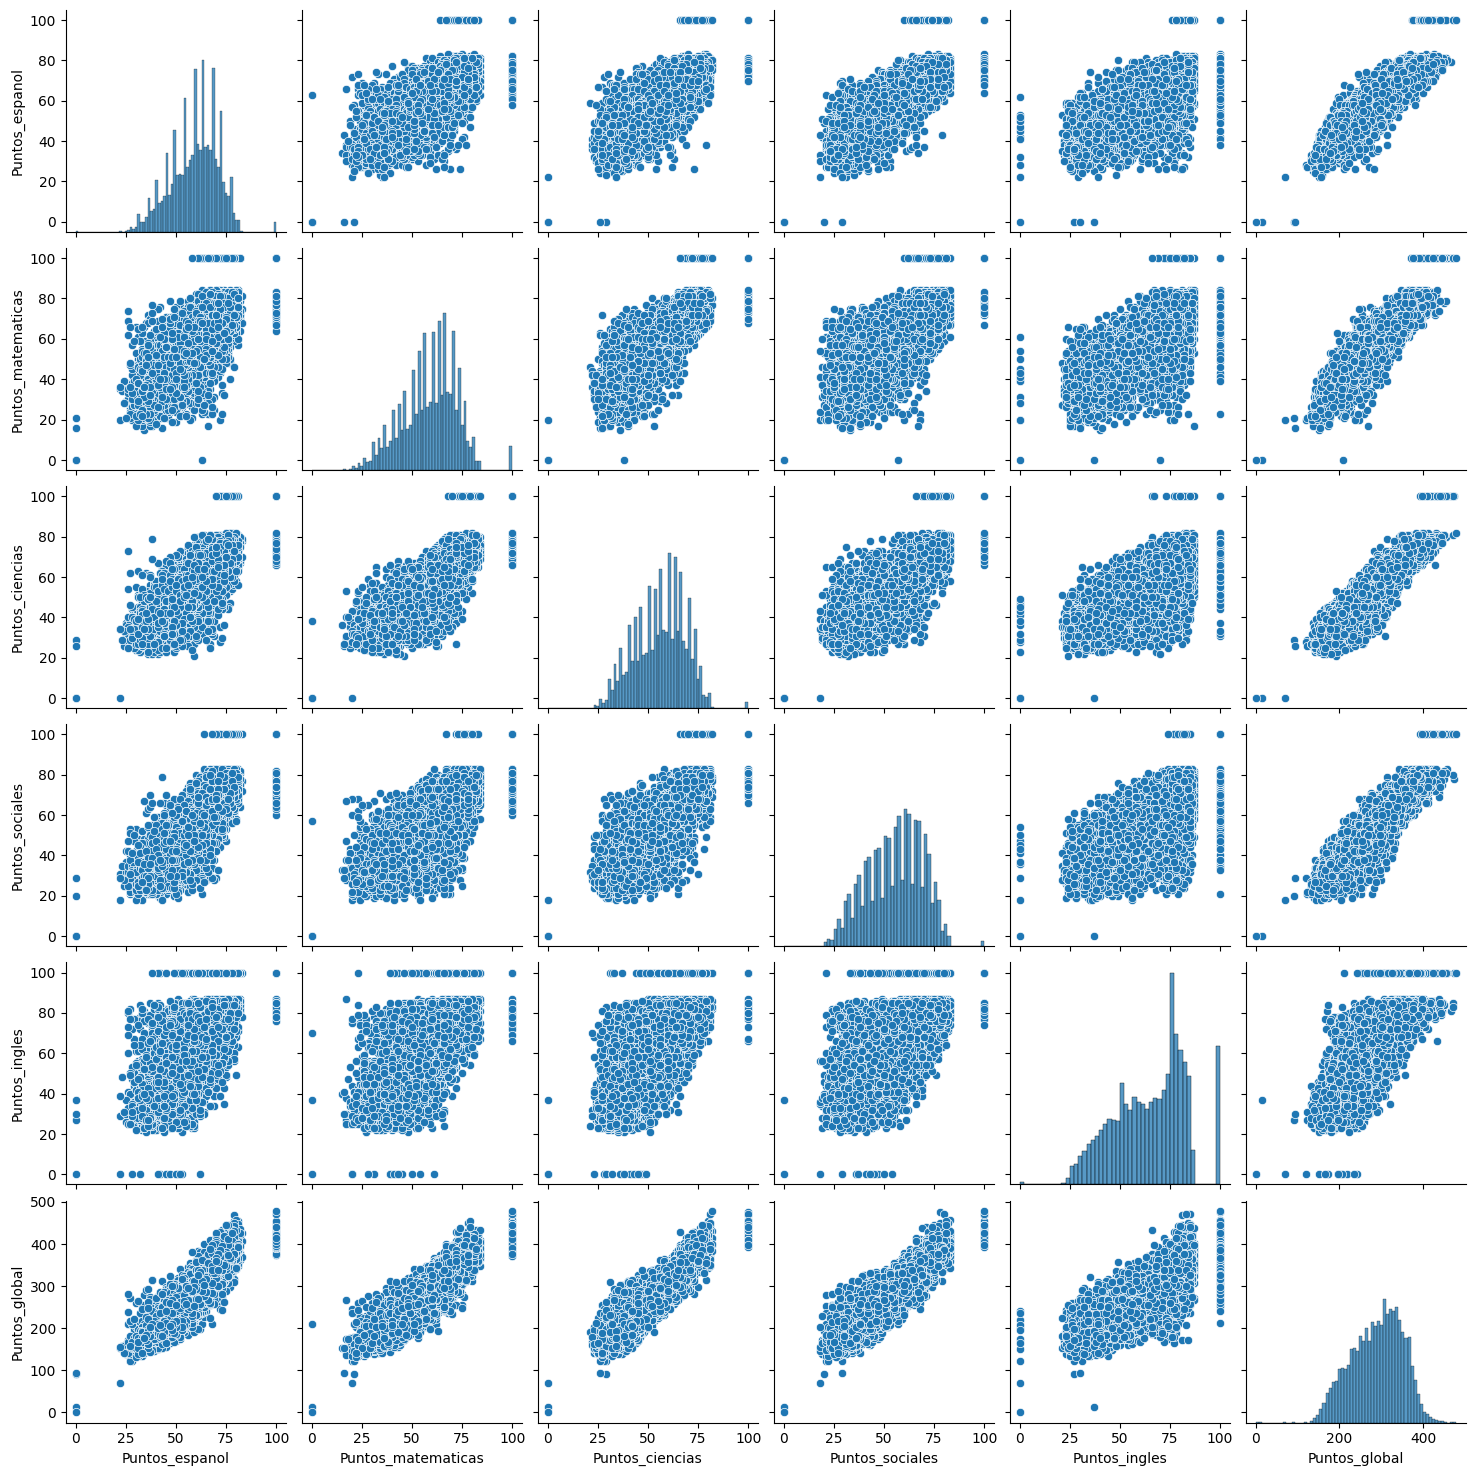

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Saber_11°_2020-1_20250914.csv"
df = pd.read_csv(file_path, low_memory=False)

# variable
cols_interes = [
    "COLE_CALENDARIO",
    "PUNT_LECTURA_CRITICA",
    "PUNT_MATEMATICAS",
    "PUNT_C_NATURALES",
    "PUNT_SOCIALES_CIUDADANAS",
    "PUNT_INGLES",
    "PUNT_GLOBAL"
]
df = df[cols_interes]

# renombrarlo
df = df.rename(columns={
    "COLE_CALENDARIO": "calendario",
    "PUNT_LECTURA_CRITICA": "Puntos_espanol",
    "PUNT_MATEMATICAS": "Puntos_matematicas",
    "PUNT_C_NATURALES": "Puntos_ciencias",
    "PUNT_SOCIALES_CIUDADANAS": "Puntos_sociales",
    "PUNT_INGLES": "Puntos_ingles",
    "PUNT_GLOBAL": "Puntos_global"
})

# elimina filas con datos q faltan
df = df.dropna()

# stadísticas descriptivas generales
print("--- Estadísticas generales ---")
print(df.describe(), "\n")

print("--- Promedios por calendario ---")
print(df.groupby("calendario").mean(numeric_only=True))

# visualizaciones gráficas
plt.figure(figsize=(10,6))
sns.violinplot(x="calendario", y="Puntos_global", data=df) 
plt.title("Distribución de puntajes globales por calendario")
plt.show()

sns.pairplot(df[["Puntos_espanol","Puntos_matematicas","Puntos_ciencias",
                 "Puntos_sociales","Puntos_ingles","Puntos_global"]])
plt.show()


- Medias por calendario (comparación A vs B)

- Distribución de puntajes globales con violinplot

- Relaciones entre áreas con pairplot: Quienes sacan buen puntaje en matemáticas también suelen tener puntajes altos en global

## Fase 3: abordar relación variables-desempeño a través de un modelo

En esta fase propondrás, implementarás y reportarás el desempeño de uno o más modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemográficos y el desempeño en la prueba. Además, concluirás con respecto a la validez de al menos un modelo y los posibles hallazgos que se podrían reportar para el *stakeholder*.

Pautas generales:

* Seleccionar variables y proponer modelos acordes a estas y al contexto del problema.
* Utilizar librerías especializadas (ej., `statsmodels`, `sklearn`, etc.) para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Los módulos correspondientes a regresión lineal y regresión logística pueden ser útiles.
* Asegurar el cumplimiento de los supuestos y buenas prácticas de cada modelo.
* Utilizar las métricas de evaluación de desempeño (disponibles en las librerías especilizadas), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:

* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


file_path = "Saber_11°_2020-1_20250914.csv"
df = pd.read_csv(file_path, low_memory=False)
# seleccionar columnas 
cols = [
    "PUNT_GLOBAL",
    "ESTU_GENERO",
    "FAMI_ESTRATOVIVIENDA",
    "COLE_CALENDARIO"
]
df = df[cols].dropna()

#binarizar puntaje global
umbral = df["PUNT_GLOBAL"].median()
df["alto_desempeno"] = (df["PUNT_GLOBAL"] >= umbral).astype(int)

# Selección de características y variable objetivo
X = df[["ESTU_GENERO", "FAMI_ESTRATOVIVIENDA", "COLE_CALENDARIO"]].copy()
y = df["alto_desempeno"]

# clasifica variables categóricas
for col in X.columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# ---------- 5. Entrenar modelo ----------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# ---------- 6. Evaluación ----------
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(" === Resultados del modelo de Regresión Logística Binaria ===")
print(f"Exactitud: {accuracy:.3f}")


 === Resultados del modelo de Regresión Logística Binaria ===
Exactitud: 0.682


- ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
-- Sí. Con género, estrato socioeconómico y calendario académico se logra predecir el desempeño de un 68%

## Fase 4

Pautas generales:

* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar el/los parámetro(s) que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar una librería especializada (ej., `ipywidgets`, `panel`, etc.) para implementar la herramienta.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from ipywidgets import interact, Dropdown


file_path = "Saber_11°_2020-1_20250914.csv"
df = pd.read_csv(file_path, low_memory=False)


cols = ["PUNT_GLOBAL", "ESTU_GENERO", "FAMI_ESTRATOVIVIENDA", "COLE_CALENDARIO"]
df = df[cols].dropna()
# binarizar puntaje global
umbral = df["PUNT_GLOBAL"].median()
df["alto_desempeno"] = (df["PUNT_GLOBAL"] >= umbral).astype(int)


X = df[["ESTU_GENERO", "FAMI_ESTRATOVIVIENDA", "COLE_CALENDARIO"]].copy()
y = df["alto_desempeno"]

# Codificar
encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le

# modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# herramienta interactiva
def predecir(genero, estrato, calendario):
    # Codificar entrada
    entrada = pd.DataFrame({
        "ESTU_GENERO": [genero],
        "FAMI_ESTRATOVIVIENDA": [estrato],
        "COLE_CALENDARIO": [calendario]
    })
    for col in entrada.columns:
        entrada[col] = encoders[col].transform(entrada[col].astype(str))
    # Predicción
    pred = log_reg.predict(entrada)[0]
    if pred == 1:
        print(" == Predicción: ALTO DESEMPEÑO en Saber 11 ==")
    else:
        print(" == Predicción: BAJO DESEMPEÑO en Saber 11 ==")

# Widgets
interact(
    predecir,
    genero=Dropdown(options=df["ESTU_GENERO"].unique(), description="Género:"),
    estrato=Dropdown(options=df["FAMI_ESTRATOVIVIENDA"].unique(), description="Estrato:"),
    calendario=Dropdown(options=df["COLE_CALENDARIO"].unique(), description="Calendario:")
)


- cuál o cuáles preguntas podrá hacerle el usuario a la herramienta y cómo aporta la respuesta al análisis?

-- El usuario podrá preguntar: “Si un estudiante es de género X, de estrato Y y calendario Z, ¿es más probable que tenga alto o bajo desempeño en la prueba Saber 11?

- Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta?

-- El usuario puede ver de manera directa la relación entre variables como estrato o calendario y el desempeño esperado